<a href="https://colab.research.google.com/github/iffyaiyan/ocr/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,747 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=bc6e1c2fa2560baf7f114eb5da174a9c099ec8fcaf4c048033dff4026232dca7
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [ ]:
import pytesseract as pt
from pytesseract import Output
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np

In [ ]:
import cv2
import pytesseract
import numpy as np
import os

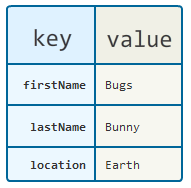

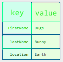

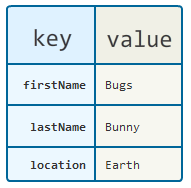

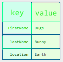

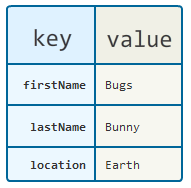

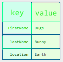

In [ ]:
# from __future__ import print_function

# import cv2

# import numpy as np

per = 25

roi = [[(7 , 7), (93 , 66), 'key', 'value'],
      [(93 , 8), (181 , 65), 'key', 'value'],
      [(9 , 63), (96 , 100), 'key', 'value'],
      [(91 , 66), (181 , 103), 'key', 'value'],
      [(6 , 108), (93 , 150), 'key', 'value'],
      [(93 , 107), (178 , 146), 'key', 'value'],
      [(8 , 147), (93 , 179), 'key', 'value'],
      [(95 , 150),(180 , 179), 'key', 'value']]

imgQ = cv2.imread('/content/key_value.png')
h,w,c = imgQ.shape

orb = cv2.ORB_create(1000)
kp1, des1 = orb.detectAndCompute(imgQ, None)

path = '/content/kay'
myPicList = os.listdir(path)
#print(myPicList)

 

# MAX_FEATURES = 500

# GOOD_MATCH_PERCENT = 0.15


for j,y in enumerate(myPicList):
  #img = io.imread(path + "/" + y)
  img = cv2.imread(path + "/" + y)
  kp2, des2 = orb.detectAndCompute(img, None)

  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

  matches = matcher.match(des2, des1, None)
  matches.sort(key= lambda x: x.distance)

  matches.sort(key= lambda x: x.distance)
  good = matches[:int(len(matches)*(per/100))]

  imgMatch = cv2.drawMatches(img, kp2, imgQ, kp1, good[:100], None)

  srcPoints = np.float32([kp2[m.queryIdx].pt for m in good]).reshape(-1,1,2)
  dstPoints = np.float32([kp1[m.trainIdx].pt for m in good]).reshape(-1,1,2)
 
  M, _ = cv2.findHomography(srcPoints, dstPoints, cv2.RANSAC, 5.0)
  imgScan = cv2.warpPerspective(img, M, (w,h))


  cv2_imshow(imgScan)
  imgShow = imgScan.copy()
  imgMask = np.zeros_like(imgShow)
  

 
  for x,r in enumerate(roi):
      cv2.rectangle(imgMask, ((r[0][0]), r[0][1]), ((r[1][0]), r[1][1]), (0,255,0), cv2.FILLED)
      imgShow = cv2.addWeighted(imgShow, 0.99, imgMask, 0.1, 0)
  imgShow = cv2.resize(imgShow, (w//3, h//3))
  cv2_imshow(imgShow)


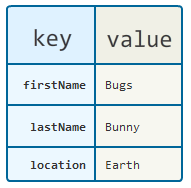

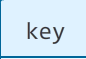

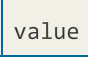

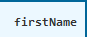

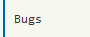

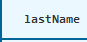

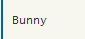

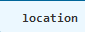

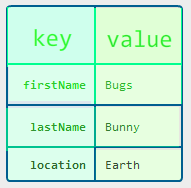

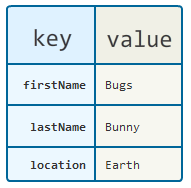

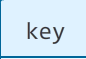

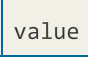

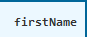

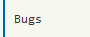

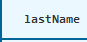

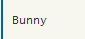

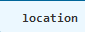

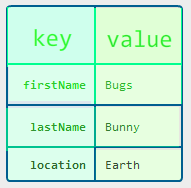

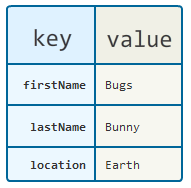

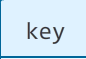

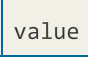

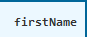

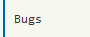

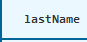

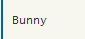

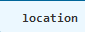

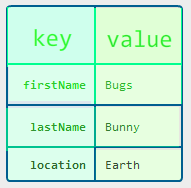

In [ ]:
per = 25

roi = [[(7 , 7), (93 , 66), 'key', 'value'],
      [(93 , 8), (181 , 65), 'key', 'value'],
      [(9 , 63), (96 , 100), 'key', 'value'],
      [(91 , 66), (181 , 103), 'key', 'value'],
      [(6 , 108), (93 , 150), 'key', 'value'],
      [(93 , 107), (178 , 146), 'key', 'value'],
      [(8 , 147), (93 , 179), 'key', 'value'],
      [(95 , 150),(180 , 179), 'key', 'value']]

imgQ = cv2.imread('/content/key_value.png')
h,w,c = imgQ.shape

orb = cv2.ORB_create(1000)
kp1, des1 = orb.detectAndCompute(imgQ, None)

path = '/content/kay'
myPicList = os.listdir(path)
#print(myPicList)

 

# MAX_FEATURES = 500

# GOOD_MATCH_PERCENT = 0.15


for j,y in enumerate(myPicList):
  #img = io.imread(path + "/" + y)
  img = cv2.imread(path + "/" + y)
  kp2, des2 = orb.detectAndCompute(img, None)

  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

  matches = matcher.match(des2, des1, None)
  matches.sort(key= lambda x: x.distance)

  matches.sort(key= lambda x: x.distance)
  good = matches[:int(len(matches)*(per/100))]

  imgMatch = cv2.drawMatches(img, kp2, imgQ, kp1, good[:100], None)

  srcPoints = np.float32([kp2[m.queryIdx].pt for m in good]).reshape(-1,1,2)
  dstPoints = np.float32([kp1[m.trainIdx].pt for m in good]).reshape(-1,1,2)
 
  M, _ = cv2.findHomography(srcPoints, dstPoints, cv2.RANSAC, 5.0)
  imgScan = cv2.warpPerspective(img, M, (w,h))


  cv2_imshow(imgScan)
  imgShow = imgScan.copy()
  imgMask = np.zeros_like(imgShow)
  

 
  for x,r in enumerate(roi):
      cv2.rectangle(imgMask, ((r[0][0]), r[0][1]), ((r[1][0]), r[1][1]), (0,255,0), cv2.FILLED)
      imgShow = cv2.addWeighted(imgShow, 0.99, imgMask, 0.1, 0)

      imgCrop = imgScan[r[0][1]:r[1][1], r[0][0]:r[1][0]]
      cv2_imshow(imgCrop)

      
  #imgShow = cv2.resize(imgShow, (w//3, h//3))
  cv2_imshow(imgShow)

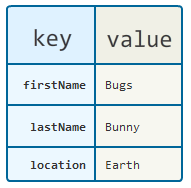

 ########################## Extracting Data from Form 0 ##########################
value :key

value :value

value :
value :Bugs

value :
value :Bunny

value :location

value :Earth



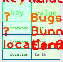

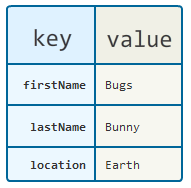

 ########################## Extracting Data from Form 1 ##########################
value :key

value :value

value :
value :Bugs

value :
value :Bunny

value :location

value :Earth



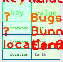

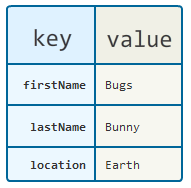

 ########################## Extracting Data from Form 2 ##########################
value :key

value :value

value :
value :Bugs

value :
value :Bunny

value :location

value :Earth



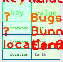

In [ ]:
per = 25

pixelThresold = 500

roi = [[(7 , 7), (93 , 66), 'key', 'value'],
      [(93 , 8), (181 , 65), 'key', 'value'],
      [(9 , 63), (96 , 100), 'key', 'value'],
      [(91 , 66), (181 , 103), 'key', 'value'],
      [(6 , 108), (93 , 150), 'key', 'value'],
      [(93 , 107), (178 , 146), 'key', 'value'],
      [(8 , 147), (93 , 179), 'key', 'value'],
      [(95 , 150),(180 , 179), 'key', 'value']]

imgQ = cv2.imread('/content/key_value.png')
h,w,c = imgQ.shape

orb = cv2.ORB_create(1000)
kp1, des1 = orb.detectAndCompute(imgQ, None)

path = '/content/kay'
myPicList = os.listdir(path)
#print(myPicList)

 

# MAX_FEATURES = 500

# GOOD_MATCH_PERCENT = 0.15


for j,y in enumerate(myPicList):
  #img = io.imread(path + "/" + y)
  img = cv2.imread(path + "/" + y)
  kp2, des2 = orb.detectAndCompute(img, None)

  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

  matches = matcher.match(des2, des1, None)
  matches.sort(key= lambda x: x.distance)

  matches.sort(key= lambda x: x.distance)
  good = matches[:int(len(matches)*(per/100))]

  imgMatch = cv2.drawMatches(img, kp2, imgQ, kp1, good[:100], None)

  srcPoints = np.float32([kp2[m.queryIdx].pt for m in good]).reshape(-1,1,2)
  dstPoints = np.float32([kp1[m.trainIdx].pt for m in good]).reshape(-1,1,2)
 
  M, _ = cv2.findHomography(srcPoints, dstPoints, cv2.RANSAC, 5.0)
  imgScan = cv2.warpPerspective(img, M, (w,h))


  cv2_imshow(imgScan)
  imgShow = imgScan.copy()
  imgMask = np.zeros_like(imgShow)
  
  myData = []

  print(f' ########################## Extracting Data from Form {j} ##########################')
 
  for x,r in enumerate(roi):
      cv2.rectangle(imgMask, ((r[0][0]), r[0][1]), ((r[1][0]), r[1][1]), (0,255,0), cv2.FILLED)
      imgShow = cv2.addWeighted(imgShow, 0.99, imgMask, 0.1, 0)

      imgCrop = imgScan[r[0][1]:r[1][1], r[0][0]:r[1][0]]
      # cv2_imshow(imgCrop)

      if r[2] == 'key':
        print('{} :{}'.format(r[3], pytesseract.image_to_string(imgCrop)))
        myData.append(pytesseract.image_to_string(imgCrop))
      
      if r[2] == 'box':
        imgGray = cv2.cvtColor(imgCrop, cv2.COLOR_BGR2GRAY)
        imgThresh = cv2.threshold(imgGray, 170, 255, cv2.THRESH_BINARY_INV)[1]
        totalPixels = cv2.countNonZero(imgThresh)
        if totalPixels>pixelThreshold: totalPixels = 1;
        else: totalPixels = 0
        print(f'{r[3]} : {totalPixels}')
        myData.append(totalPixels)
      cv2.putText(imgShow, str(myData[x]), (r[0][0], r[0][1]), cv2.FONT_HERSHEY_PLAIN, 2.5, (0,0,255),4)
      
  imgShow = cv2.resize(imgShow, (w//3, h//3))
  cv2_imshow(imgShow)

# Finding the Mouse points

The below code was used to find the mousepoints and was run on my system in Jupyter Lab so I have attached the code below 

In [ ]:
import cv2
import numpy as np

#This will display all the available mouse click events  
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

#This variable we use to store the pixel location
refPt = []

#click event function
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,",",y)
        refPt.append([x,y])
        font = cv2.FONT_HERSHEY_SIMPLEX
        strXY = str(x)+", "+str(y)
        cv2.putText(img, strXY, (x,y), font, 0.5, (255,255,0), 2)
        cv2.imshow("image", img)

    if event == cv2.EVENT_RBUTTONDOWN:
        blue = img[y, x, 0]
        green = img[y, x, 1]
        red = img[y, x, 2]
        font = cv2.FONT_HERSHEY_SIMPLEX
        strBGR = str(blue)+", "+str(green)+","+str(red)
        cv2.putText(img, strBGR, (x,y), font, 0.5, (0,255,255), 2)
        cv2.imshow("image", img)


#Here, you need to change the image name and it's path according to your directory
img = cv2.imread('E:\Key/sbi.png')
cv2.imshow("image", img)

#calling the mouse click event
cv2.setMouseCallback("image", click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()